In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
import sys
from pathlib import Path

# Add parent directory to path to import config
sys.path.append(str(Path().resolve().parent))
from config import DATA_DIR

data_folder = str(DATA_DIR) + "\\"

In [17]:
# Load the union dataset for unsupervised learning
from config import UNION_CLEANED_DATA_PATH
df_union = pd.read_csv(UNION_CLEANED_DATA_PATH)

# Prepare features and target
X_union = df_union.drop(columns=['target'])
y_union = df_union['target']

print(f"Data shape: {df_union.shape}")
print(f"Features: {X_union.columns.tolist()}")
print(f"Target distribution:\n{y_union.value_counts()}")

Data shape: (720, 21)
Features: ['sex', 'slope_1.7017543859649122', 'age', 'exang', 'oldpeak', 'fbs', 'ca_2.0', 'thalach', 'trestbps', 'ca_0.6807817589576547', 'ca_1.0', 'ca_3.0', 'thal_7.0', 'chol', 'thal_4.985', 'cp_4.0', 'cp_2.0', 'slope_2.0', 'restecg_0.5682451253481894', 'cp_3.0']
Target distribution:
target
0    360
1    360
Name: count, dtype: int64


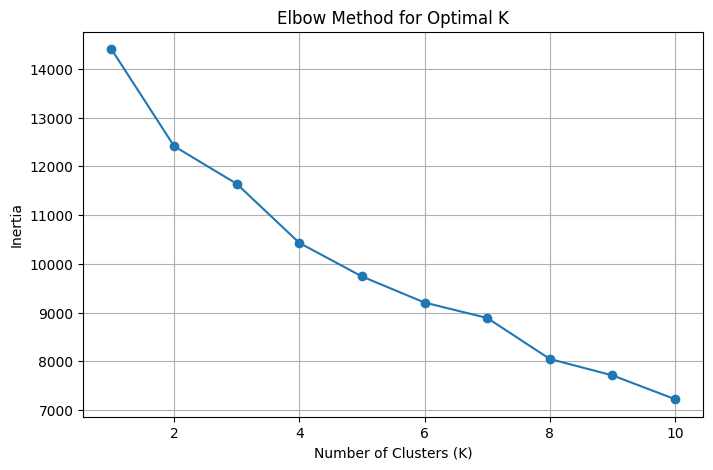

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_union)  # Use your RF∪RFE feature DataFrame

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [19]:
k = 2
kmeans_final = KMeans(n_clusters=k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

df_clusters = X_union.copy()
df_clusters['Cluster'] = clusters
df_clusters['Actual'] = y_union.values

print(df_clusters['Cluster'].value_counts().sort_index())


Cluster
0    369
1    351
Name: count, dtype: int64


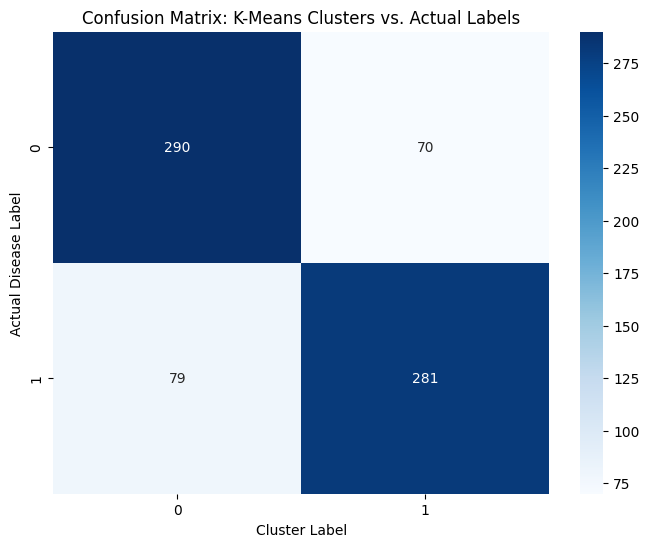

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df_clusters['Actual'], df_clusters['Cluster'])

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Cluster Label")
plt.ylabel("Actual Disease Label")
plt.title("Confusion Matrix: K-Means Clusters vs. Actual Labels")
plt.show()


In [21]:
kmeans_2 = KMeans(n_clusters=k, random_state=42)
clusters_2 = kmeans_2.fit_predict(X_scaled)

df_clusters = X_union.copy()
df_clusters['Cluster'] = clusters_2
df_clusters['Actual'] = y_union.values


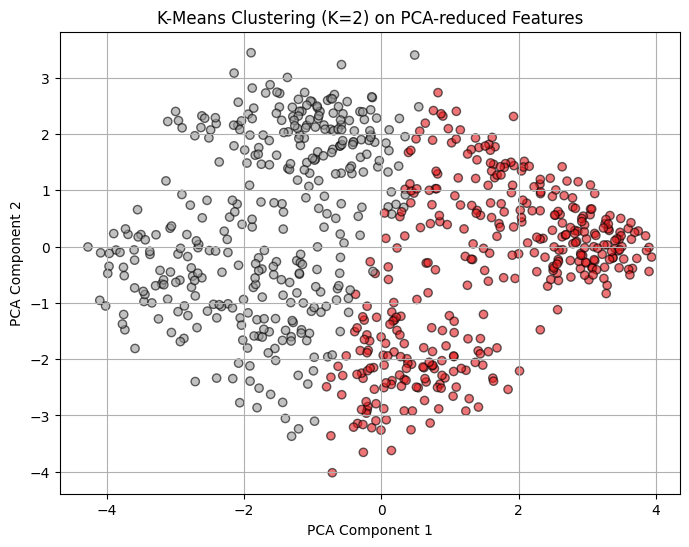

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters_2, cmap='Set1', alpha=0.6, edgecolor='k')
plt.title('K-Means Clustering (K=2) on PCA-reduced Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


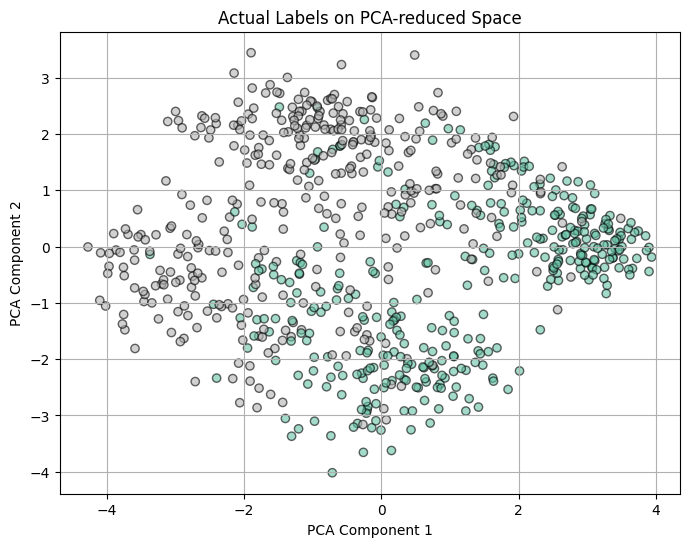

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=df_clusters['Actual'], cmap='Set2', alpha=0.6, edgecolor='k')
plt.title('Actual Labels on PCA-reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


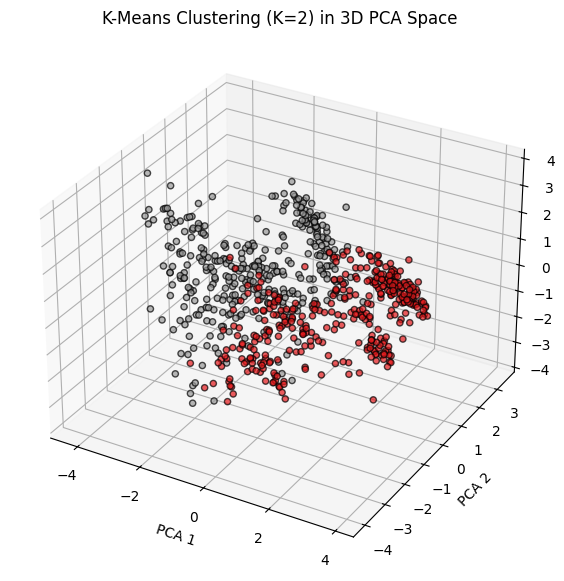

In [24]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=df_clusters['Cluster'], cmap='Set1', edgecolor='k', alpha=0.7)
ax.set_title('K-Means Clustering (K=2) in 3D PCA Space')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


In [25]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

df_clusters['HC_Cluster'] = hc_labels


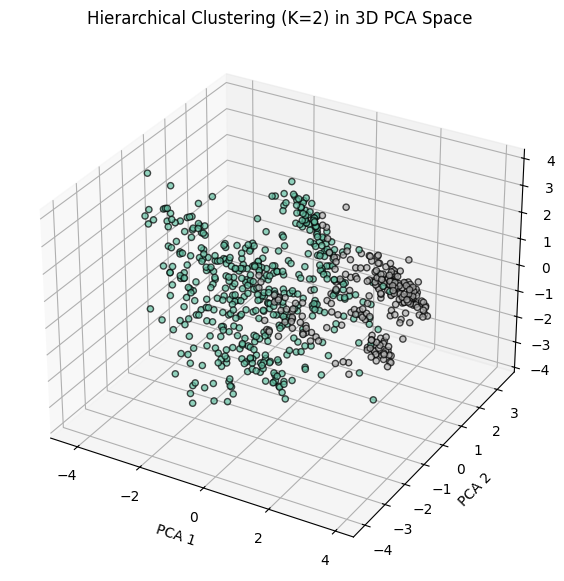

In [26]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=df_clusters['HC_Cluster'], cmap='Set2', edgecolor='k', alpha=0.7)
ax.set_title('Hierarchical Clustering (K=2) in 3D PCA Space')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


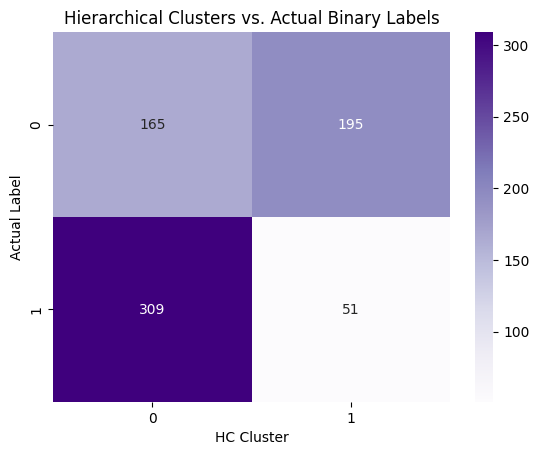

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_hc = confusion_matrix(df_clusters['Actual'], df_clusters['HC_Cluster'])
sns.heatmap(cm_hc, annot=True, fmt='d', cmap='Purples')
plt.xlabel('HC Cluster')
plt.ylabel('Actual Label')
plt.title('Hierarchical Clusters vs. Actual Binary Labels')
plt.show()


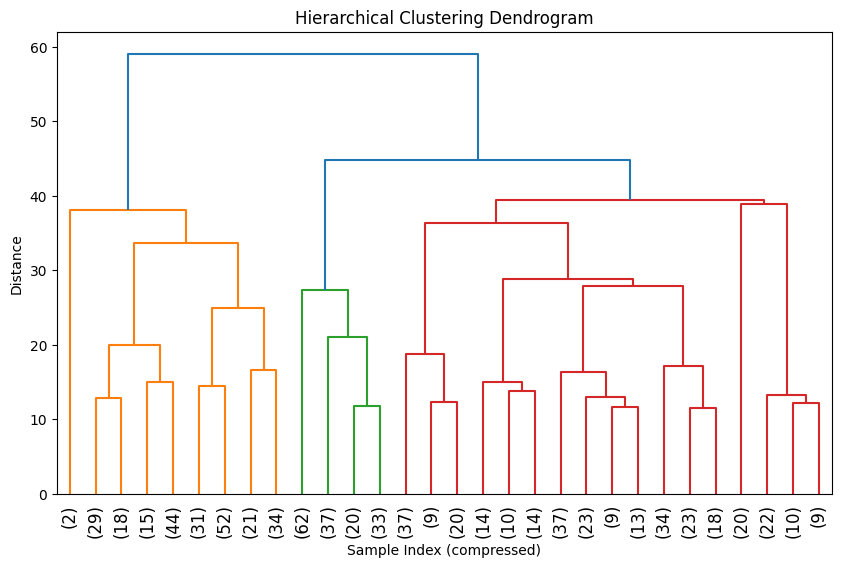

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index (compressed)')
plt.ylabel('Distance')
plt.show()


In [29]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(df_clusters['Actual'], df_clusters['Cluster'])
ari_hc = adjusted_rand_score(df_clusters['Actual'], df_clusters['HC_Cluster'])

print("Adjusted Rand Index (K-Means):", ari_kmeans)
print("Adjusted Rand Index (HC):", ari_hc)


Adjusted Rand Index (K-Means): 0.34261249794082144
Adjusted Rand Index (HC): 0.15894754717404447


In [30]:
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(X_scaled, df_clusters['Cluster'])
sil_hc = silhouette_score(X_scaled, df_clusters['HC_Cluster'])

print("Silhouette Score (K-Means):", sil_kmeans)
print("Silhouette Score (HC):", sil_hc)


Silhouette Score (K-Means): 0.14629984060741957
Silhouette Score (HC): 0.11789395524805768
